<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/nlp/bert/bert_model_architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers -qq
!pip install fastdot -qq

     |████████████████████████████████| 1.3MB 5.8MB/s 
     |████████████████████████████████| 890kB 39.3MB/s 
     |████████████████████████████████| 1.1MB 42.8MB/s 
     |████████████████████████████████| 2.9MB 46.7MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 


In [2]:
import sys

from transformers import BertModel
from fastdot import *

https://huggingface.co/transformers/_modules/transformers/modeling_bert.html

In [6]:
model_version = 'bert-large-uncased'
model = BertModel.from_pretrained(model_version, output_attentions=True)
#model

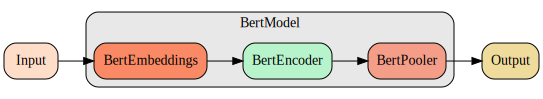

In [4]:
#@title ## Top Level
#@markdown Top Level

def add_input_output(c, in_tooltip='', out_tooltip=''):
  inp = Node('Input', tooltip=in_tooltip)
  outp = Node('Output', tooltip=out_tooltip)
  g = graph_items(inp, c, outp)
  g.add_items(
      inp.connect(c.get_nodes()[0]), 
      c.get_nodes()[-1].connect(outp)
  )
  return g

cl = seq_cluster(['BertEmbeddings', 'BertEncoder', 'BertPooler'], 'BertModel')
cl.get_nodes()[0].set_tooltip('input=1024,output=1024')
cl.get_nodes()[1].set_tooltip('input=1024,output=1024')
cl.get_nodes()[2].set_tooltip('Linear,input=1024,output=1024,bias=True')
add_input_output(cl, 'input=1024', 'output=1024')

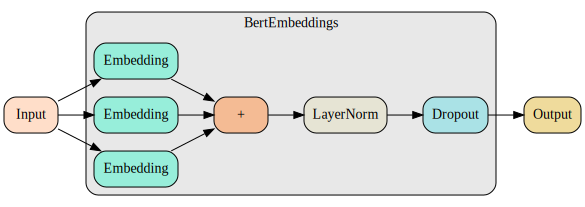

In [5]:
#@title BertEmbeddings
#@markdown BertEmbeddings

cl=seq_cluster(['Embedding','+','LayerNorm'],'BertEmbeddings')
cl.get_nodes()[0].set_tooltip('WordEmbeddings, num_embeddings =30522,embedding_dim =1024,padding_idx=0,output=1024')
cl.get_nodes()[2].set_tooltip('input=1024,eps=1e-12, elementwise_affine=True,output=1024')
nodes=cl.add_items('Embedding','Embedding','Dropout')
cl.add_items(nodes[0].connect(cl.get_nodes()[1]),nodes[1].connect(cl.get_nodes()[1]))
cl.add_items(cl.get_nodes()[2].connect(nodes[2]))

nodes[0].set_tooltip('PositionEmbeddings, num_embeddings =512,embedding_dim =1024,output=1024')
nodes[1].set_tooltip('TokenTypeEmbeddings, num_embeddings =2,embedding_dim =1024,output=1024')
nodes[2].set_tooltip('p=0.1, inplace=False')
inp=Node('Input',tooltip='input=1024')
outp=Node('Output',tooltip='output=1024')
g=graph_items(inp,cl,outp)
g.add_items(inp.connect(cl.get_nodes()[0]),inp.connect(nodes[0]),inp.connect(nodes[1]),cl.get_nodes()[-1].connect(outp))
g